## Challenge Set 6

**Subject:** Linear Regression and Learning Curve Challenges

**Date:** 2018-01-29

**Name:** Kaitlin Puryear

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

%matplotlib inline

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
# Generate the data and fit it on the graph
X = [x for x in range(1,10000,1)]

beta0 = 4
beta1 = 12
y = [beta0 + beta1*np.log(n) +random.random() for n in X]
data = pd.DataFrame({'y':y, 'x':X})

NameError: name 'random' is not defined

**Grader's note: Make sure your code runs as written.**

In [3]:
# Generate the data and fit it on the graph
import random

X = [x for x in range(1,10000,1)]

beta0 = 4
beta1 = 12
y = [beta0 + beta1*np.log(n) +random.random() for n in X]
data = pd.DataFrame({'y':y, 'x':X})

In [4]:
# We are fitting a X^2 model to this data, so make an X^2 column
data['X2'] = data['x']**2
data['constant'] = 1

In [5]:
# Fit Ordinary Least Squares Regression with StatsModels
quads = smf.ols(formula = 'y ~ X2', data=data).fit()
y_pred = quads.predict(data[['constant', 'X2']])
quads.summary()

NameError: name 'smf' is not defined

**Grader's Note: Again, make sure you import the right packages so I don't have to hunt it down.**

In [8]:
# Fit Ordinary Least Squares Regression with StatsModels
import statsmodels.formula.api as smf
quads = smf.ols(formula = 'y ~ X2', data=data).fit()
y_pred = quads.predict(data[['constant', 'X2']])
quads.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:02:25   Log-Likelihood:                -34939.
No. Observations:                9999   AIC:                         6.988e+04
Df Residuals:                    9997   BIC:                         6.990e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.0355      0.120    778.386      0.000      92.801      93.270
X2          2.998e-07   2.67e-09    112.168      0.000    2.95e-07    3.05e-07
==============================================================================
Omnibus:                     6738.829   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109171.658
Skew:                          -3.052   Prob(JB):                         0.00
Kurtosis:                      17.993   Cond. No.                     6.71e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

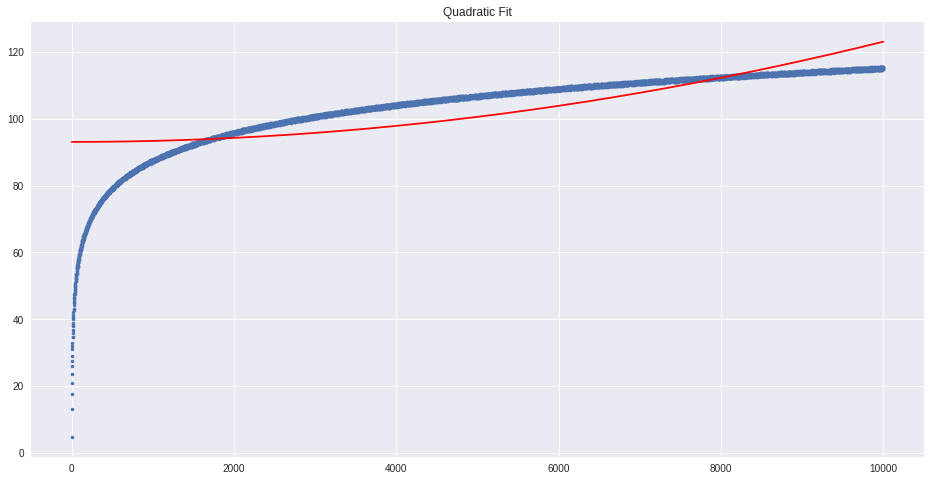

In [9]:
# Plot the chart and the predicted line
plt.figure(figsize=(16,8))
plt.plot(data.x, data.y,".", data.x, y_pred,"r-")
plt.title("Quadratic Fit");

In [10]:
# Now we are trying to make a log(x) model, so create a log(x) column
data['logX'] = np.log(data['x'])
data['constant'] = 1

In [11]:
logs = smf.ols(formula = 'y ~ logX', data=data).fit()
y_pred = logs.predict(data[['constant', 'logX']])
logs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.754e+07
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        17:02:50   Log-Likelihood:                -1663.5
No. Observations:                9999   AIC:                             3331.
Df Residuals:                    9997   BIC:                             3345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5016      0.024    189.942      0.000       4.455       4.548
logX          11.9997      0.003   4187.899      0.000      11.994      12.005
==============================================================================
Omnibus:                     8058.604   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.575
Skew:                          -0.007   Prob(JB):                    3.48e-129
Kurtosis:                       1.808   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

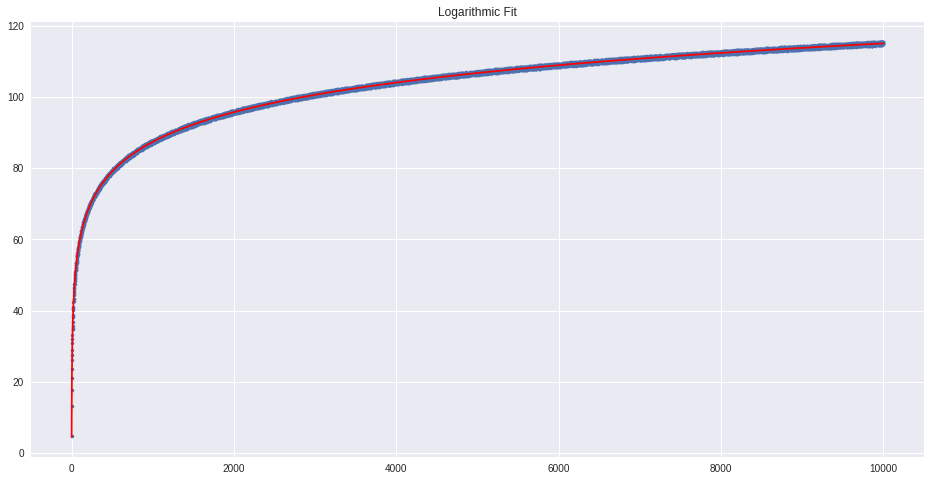

In [12]:
plt.figure(figsize=(16,8))
plt.plot(data.x, data.y,".", data.x, y_pred,"r-")
plt.title("Logarithmic Fit");

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [13]:
# Generate data and fit it to the given format
# create a column that is quadratic

X = [x for x in range(-1000,1000,1)]

b0 = 4
b1 = 12
b2 = 48
y = [b0 + b1*n +b2*(n**2)+random.random() for n in X]
data = pd.DataFrame({'y':y, 'X':X, "constant":1})
data["X2"] = data['X']**2

In [14]:
# Find the R^2 score using Train/Test Error
lr=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data[['X2', 'X', "constant"]], y, test_size=0.3)

a = lr.fit(X_train, y_train)   #fit on train
b = lr.fit(X_test, y_test)   #score on test

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.99999999999999956

In [15]:
# Print Train Error and Test Error
print(mean_squared_error(y_train, a.predict(X_train)))
print(mean_squared_error(y_test, b.predict(X_test)))

0.0812887364891
0.0776579560427


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


In [16]:
data[['X','X2','constant']]

,X,X2,constant
0,-1000,1000000,1
1,-999,998001,1
2,-998,996004,1
3,-997,994009,1
4,-996,992016,1
5,-995,990025,1
6,-994,988036,1
7,-993,986049,1
8,-992,984064,1
9,-991,982081,1


In [17]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, y, label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:,np.newaxis]), color='red', label=label)
    ax.set_ylim((-100, 20000))
    ax.set_xlim((-20, 20))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)


In [18]:
x_plot = np.linspace(-999,999,2000)

trainerror = []
testerror = []
r2 = []
aic = []

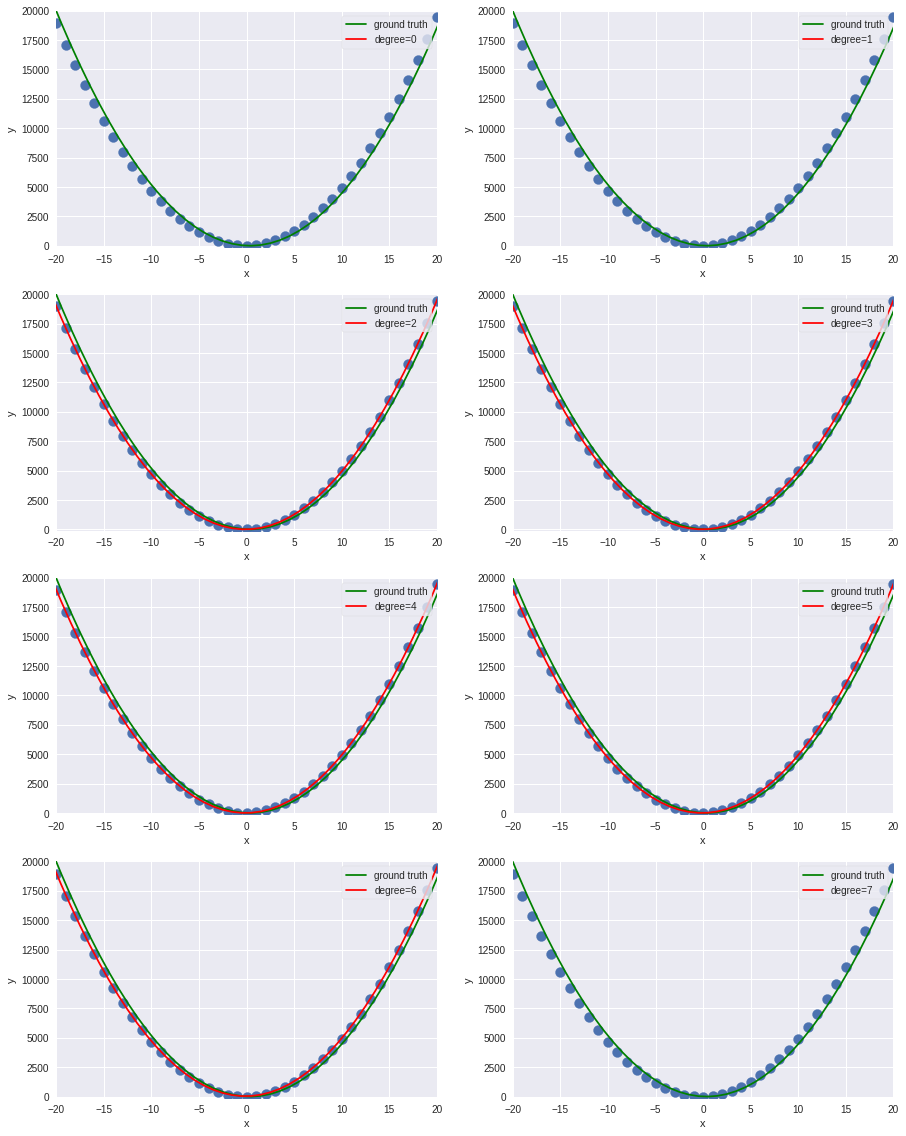

In [19]:
trainerror = []
testerror = []
r2 = []
aic = []
degrees = [0,1,2,3,4,5,6,7]
# [:,np.newaxis]

fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    X_train, X_test, y_train, y_test = train_test_split(data['X'][:,np.newaxis], data.y, test_size=0.3)
    est.fit(X_train, y_train)
    y_train_pred = est.predict(X_train)
    y_test_pred = est.predict(X_test)

    trainerror.append(mean_squared_error(y_train, y_train_pred))
    testerror.append(mean_squared_error(y_test,y_test_pred))
    r2.append(est.score(data['X'][:,np.newaxis], data.y))
    
    new4 = est.fit(data['X'][:,np.newaxis], data.y)
    y_hat = new4.predict(data['X'][:,np.newaxis])
    resid = data.y - y_hat
    sse = sum(resid**2)
    k= degree# of variables
    AIC= 2*k - 2*np.log(sse)
    aic.append(AIC)
    
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

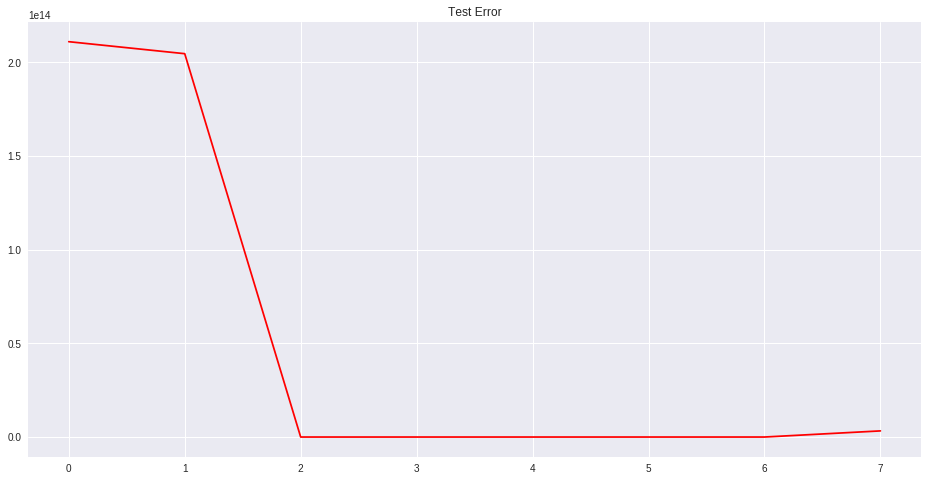

In [20]:
plt.figure(figsize=(16,8))
plt.plot(degrees, testerror,"r-")
plt.title("Test Error");

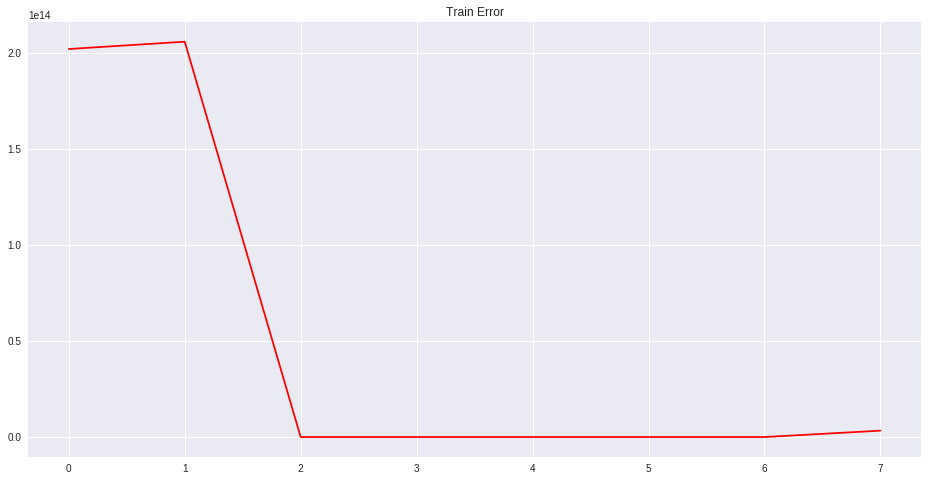

In [21]:
plt.figure(figsize=(16,8))
plt.plot(degrees, trainerror,"r-")
plt.title("Train Error");

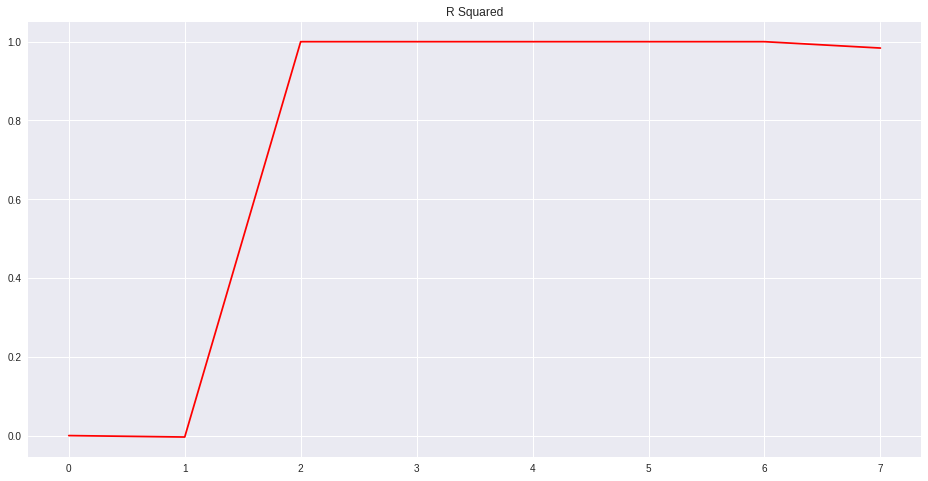

In [22]:
plt.figure(figsize=(16,8))
plt.plot(degrees, r2,"r-")
plt.title("R Squared")

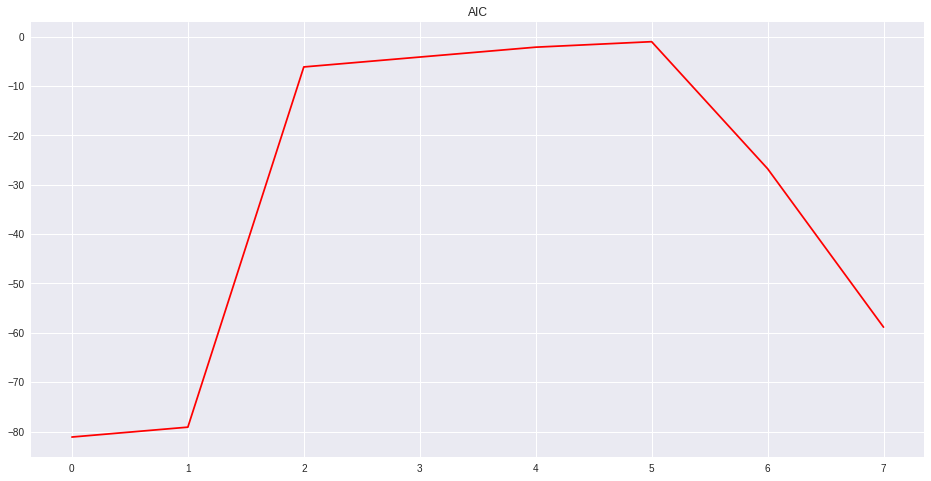

In [23]:
plt.figure(figsize=(16,8))
plt.plot(degrees, aic,"r-")
plt.title("AIC");

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

**Grader's Note: Question 4 i